In [ ]:
# Remember to run this code chunk!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Week 3 Short Exercises

This is to be completed after week 3 presentation.

We will be using the famous Titanic dataset for a few short pandas exercise problems. Each exercise should only take a few lines to accomplish. If you find yourself writing long functions, make sure to search online or refer to documentation for pandas' built-in functions!

In [ ]:
# Run this code block to load the dataset (requires internet connection)
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Question 1: DataFrame Selection

How are the survivors (`survived`) distributed across travel classes? Create a `Series` whose index is the `class` category from the dataset (i.e. `First`, `Second`, `Third`), and whose values count the number of survivors in each class (order does not matter).

In [ ]:
# Your code goes here
titanic.groupby('class').sum()['survived']

class
First     136
Second     87
Third     119
Name: survived, dtype: int64

## Question 2: Data Visualization
According to the movie, women and children were given priority during the rescue process. Using the data, plot 3 separate bar graphs, one for each `who` category (i.e. `man`, `woman`, `child`), comparing the number of passengers who died vs survived.

Note: You should find a way to plot three separate graphs by running a single code chunk. `plt.figure()` and `plt.show()` might help. Also make sure that your x-axes are consistent across the three plots.

Text(0.5, 1.0, 'woman')

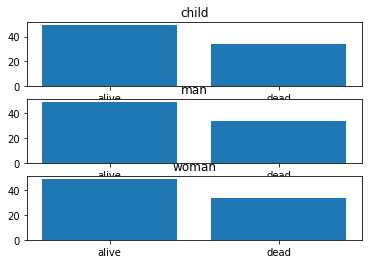

In [ ]:
# Your code goes here
survived = titanic.groupby('who').sum()['survived']
dead = titanic['who'].value_counts()-survived

child = [survived['child'], dead['child']]
man = [survived['child'], dead['child']]
woman = [survived['child'], dead['child']]

code = ['alive', 'dead']

fig, axs = plt.subplots(3)
axs[0].bar(code, child)
axs[0].set_title("child")
axs[1].bar(code, man)
axs[1].set_title("man")
axs[2].bar(code, woman)
axs[2].set_title("woman")

## Question 3: Writing Custom Functions
Write a custom function `sd` that takes in a `Series` of numerical values and returns the standard deviation without using any built-in pandas functions. Then, use this function to find the standard deviation of the `fare` paid by all passengers. Lastly, use the built-in pandas standard deviation function on the same series and compare the results. As a reminder, the standard deviation formula is: https://www.gstatic.com/education/formulas2/-1/en/population_standard_deviation.svg

Are the results the same? If they are not the same, why is that so? Refer to the pandas documentation and try to figure out what kind of standard deviation is the default pandas function calculating.

In [ ]:
# Your code goes here
# --- Custom function standard deviation calculation --- 
def sd(series):
  mean = sum(series)/len(series)
  res = 0
  for i in series:
    res += (mean - i) ** 2
  res/=len(series)
  res = math.sqrt(res)
  return res

# --- Pandas built-in standard deviation function ---
x = pd.Series([1, 2, 3, 4])
print(sd(x))
print(np.std(x))
#they are same

1.118033988749895
1.118033988749895


# Week 4 Preparation: Bollinger Bands
As a prelude to next week's lecture on trading strategy implementation, this section will give you an opportunity to work with Bollinger Bands, a technical indicator based on the statistical concept of standard deviation.

We will be using our TSLA 2020 data again for this portion of the homework. The goal of this section is to calculate Bollinger Band values based on our data, and plot both upper and lower bands on a line graph.

Please read this article for an introduction to Bollinger Bands: https://www.investopedia.com/terms/b/bollingerbands.asp

## Importing Data
First, we import the csv file into a DataFrame. Three methods are presented below (as introduced during lecture). Please only run one method, and amend the file path according to where you placed the csv file if you are using a method that involves file paths.

In [ ]:
# Google Colab Method #1
# Recommended
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']),
                index_col=0,       # Tell Pandas that the first column should be used as an index
                parse_dates=[0]    # Tell Pandas to parse the column at index 0 as dates
                )

KeyboardInterrupt: ignored

In [ ]:
# Google Colab Method #2
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/MC/TSLA.csv',
                index_col=0,       # Tell Pandas that the first column should be used as an index
                parse_dates=[0]    # Tell Pandas to parse the column at index 0 as dates
                )
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
...,...,...,...,...,...,...
2020-12-21,666.239990,668.500000,646.070007,649.859985,649.859985,58045300
2020-12-22,648.000000,649.880005,614.229980,640.340027,640.340027,51716000
2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000


In [ ]:
# Jupyter Notebook Method #1
df = pd.read_csv('TSLA.csv',
                index_col=0,       # Tell Pandas that the first column should be used as an index
                parse_dates=[0]    # Tell Pandas to parse the column at index 0 as dates
                )
df

## Calculating Bollinger Bands
Parameters for Bollinger Band calculation vary across different implementations. For the purpose of this homework we will be using Investopedia's Bollinger Band formula, which uses a 20-day moving average and a 2-standard deviation band. Note that for this implementation, we are also using "typical price" instead of closing price to calculate the moving average and standard deviation.

The formula is attached here for reference:
- BOLU = MA(TP, n) + m∗σ[TP, n]
- BOLD = MA(TP, n) − m∗σ[TP, n]
  - BOLU = Upper Bollinger Band
  - BOLD = Lower Bollinger Band
  - MA = Moving average
  - TP (typical price) = (High + Low + Close) ÷ 3
  - n = Number of days in smoothing period (typically 20)
  - m = Number of standard deviations (typically 2)
  - σ[TP, n] = Standard Deviation over last n days of TP

In [ ]:
# First, we want to calculate the daily typical price of TSLA
df['TP'] = (df['Close'] + df['High'] + df['Low'])/3

# Next, we want to calculate the 20-day moving average of the typical price
df['MA20TP'] = df.TP.rolling(window=20).mean()
df_2020 = df[list(map(lambda x: not(x), df['MA20TP'].isna()))]
# We then want to calculate our 2σ[TP, n] value
# Hint: As this is also a rolling value, can we use something similar to the 
# moving average calculation? Feel free to google or refer to pandas documentation
# if necessary
df_2020['2STD'] =  df.TP.rolling(window=20).std()

# Lastly we want to calculate the upper and lower Bollinger Bands using the formula
df_2020['BOLU'] = df_2020['MA20TP'] + 2 * df_2020['2STD']
df_2020['BOLD'] = df_2020['MA20TP'] - 2 * df_2020['2STD']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

## Plotting Bollinger Bands
Lastly, we would like to plot our results using MatPlotLib. For this plot, we want to overlay 4 line-graphs:
1. TSLA daily closing price
2. TSLA 20-day typical-price moving average
3. Upper Bollinger Band
4. Lower Bollinger Band

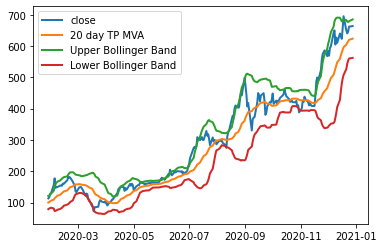

In [ ]:
# All that's left is to plot our Bollinger Bands!
# The code for the first line-graph is written for you
plt.plot(df_2020.index, df_2020['Close'], linewidth = 2, label = 'Close')

# Simply add the remaining three line-graphs onto the plot, your code here
plt.plot(df_2020.index, df_2020['MA20TP'], linewidth = 2, label = '20 day TP MVA')
plt.plot(df_2020.index, df_2020['BOLU'], linewidth = 2, label = 'Upper Bollinger Band')
plt.plot(df_2020.index, df_2020['BOLD'], linewidth = 2, label = 'Lower Bollinger Band')
plt.legend()

In [ ]:
# Question: According to the Investopedia article, "the squeeze" is a central concept
# behind Bollinger Bands. What can you comment about this phenomenon in reference
# to the Bollinger Bands plotted for TSLA stock in 2020?

# Answer: I believe that the bollinger band method was effective in predicting future volatility with the squeeze in 2020 because bollinger bands frequently contracted and expanded.